In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=ee15a60d014896c12c725077562fe5a03328002659700a46f67b21a70bb73d26
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=a74531dd761c297171a6787ce4c5abcfa64a51efc02c17aff280725b2770fad5
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9

In [ ]:
# Importing packages
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
# Installing new ones
!conda install -y -c anaconda cmake
!pip install leidenalg
!pip install louvain

/bin/bash: line 1: conda: command not found


In [ ]:
!tar -xvf '/content/GSE167377_RAW.tar'

GSM5104042_S1_barcodes.tsv.gz
GSM5104042_S1_features.tsv.gz
GSM5104042_S1_matrix.mtx.gz
GSM5104043_S2_barcodes.tsv.gz
GSM5104043_S2_features.tsv.gz
GSM5104043_S2_matrix.mtx.gz
GSM5104044_S3_barcodes.tsv.gz
GSM5104044_S3_features.tsv.gz
GSM5104044_S3_matrix.mtx.gz
GSM5104045_S4_barcodes.tsv.gz
GSM5104045_S4_features.tsv.gz
GSM5104045_S4_matrix.mtx.gz


In [ ]:
!ls

GSE167377_RAW.tar	       GSM5104043_S2_features.tsv.gz  GSM5104045_S4_barcodes.tsv.gz
GSM5104042_S1_barcodes.tsv.gz  GSM5104043_S2_matrix.mtx.gz    GSM5104045_S4_features.tsv.gz
GSM5104042_S1_features.tsv.gz  GSM5104044_S3_barcodes.tsv.gz  GSM5104045_S4_matrix.mtx.gz
GSM5104042_S1_matrix.mtx.gz    GSM5104044_S3_features.tsv.gz  sample_data
GSM5104043_S2_barcodes.tsv.gz  GSM5104044_S3_matrix.mtx.gz


In [ ]:
# Defining a function to read the files into adata for each sample
def read_sample(sample_prefix):
    adata = sc.read_10x_mtx(
        '/content',  # Replace with the path to your data
        var_names='gene_symbols',
        cache=True,
        prefix=sample_prefix
    )
    adata.var_names_make_unique()
    return adata

In [ ]:
# Reading each sample data
adata_s1 = read_sample('GSM5104042_S1_')
adata_s2 = read_sample('GSM5104043_S2_')
adata_s3 = read_sample('GSM5104044_S3_')
adata_s4 = read_sample('GSM5104045_S4_')

In [ ]:
adata_s1

AnnData object with n_obs × n_vars = 14668 × 24169
    var: 'gene_ids', 'feature_types'

In [ ]:
adata_s2

AnnData object with n_obs × n_vars = 12000 × 24169
    var: 'gene_ids', 'feature_types'

In [ ]:
adata_s3

AnnData object with n_obs × n_vars = 15238 × 24169
    var: 'gene_ids', 'feature_types'

In [ ]:
adata_s4

AnnData object with n_obs × n_vars = 6000 × 24169
    var: 'gene_ids', 'feature_types'

# Analysing single sample

In [ ]:
adata_s1

AnnData object with n_obs × n_vars = 14668 × 24169
    var: 'gene_ids', 'feature_types'

Quality Control

In [ ]:
# Filtering out low quality cells and genes
sc.pp.filter_cells(adata_s1, min_genes=200) # removing cells with fewer than 200 genes
sc.pp.filter_genes(adata_s1, min_cells=3)  # removing genes that are found in fewer than 3 cells

In [ ]:
adata_s1.obs

,n_genes
AAACCCAAGCTATCTG-1,1019
AAACCCAAGGATTCAA-1,1889
AAACCCAAGGTTGGAC-1,1334
AAACCCACAGACCTGC-1,1953
AAACCCACAGTCAGCC-1,2021
...,...
TTTGTTGGTGATCGTT-1,577
TTTGTTGGTTTACTGG-1,3458
TTTGTTGGTTTGCAGT-1,1951
TTTGTTGTCAGTGCGC-1,2497


In [ ]:
# Identifying mitochondrial genes
Mt = ['ND1','ND2','ND3','ND4','ND5','ND6','ND4L','ATP8','ATP6','COX1','COX2','COX3','CYTB','F','V','L1','I','S1','S2','K','T','P','N','L2','E','D','C','Y','Q','R','H','M','A','G','W','EYY68_mgr01','EYY68_mgr02']
adata_s1.var['mt'] = adata_s1.var.index.isin(Mt)

In [ ]:
adata_s1.var

,gene_ids,feature_types,n_cells,mt
LOC107049475,LOC107049475,Gene Expression,319,False
CLC2DL5,CLC2DL5,Gene Expression,1975,False
LOC112532835,LOC112532835,Gene Expression,581,False
CLC2DL2,CLC2DL2,Gene Expression,3418,False
CLC2DL4,CLC2DL4,Gene Expression,525,False
...,...,...,...,...
ND4L,EYY68_mgp05,Gene Expression,6151,True
ND4,EYY68_mgp04,Gene Expression,13910,True
ND5,EYY68_mgp03,Gene Expression,13942,True
CYTB,EYY68_mgp02,Gene Expression,13999,True


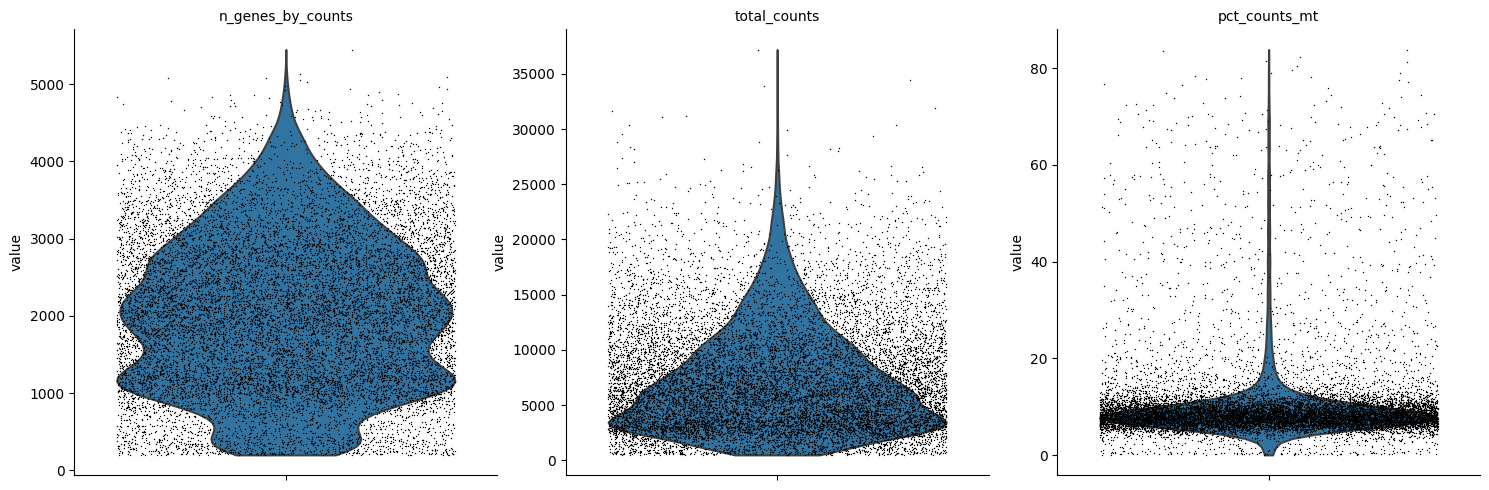

In [ ]:
# Quality control mertics
sc.pp.calculate_qc_metrics(adata_s1, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
# Violin plot
sc.pl.violin(adata_s1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

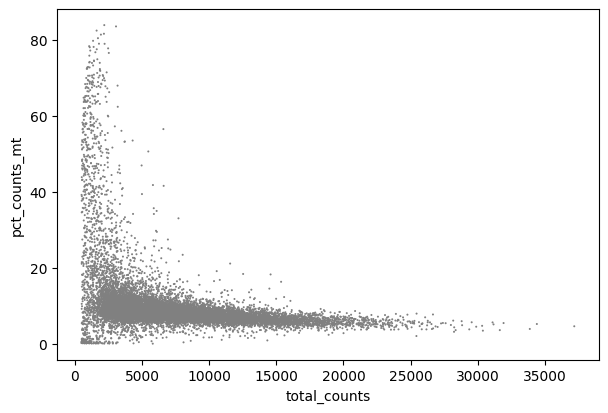

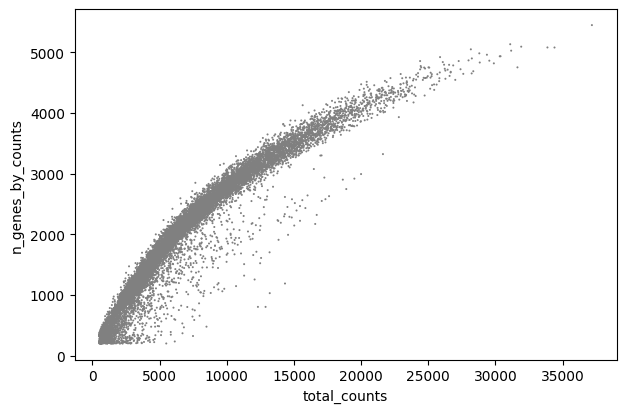

In [ ]:
sc.pl.scatter(adata_s1, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_s1, x='total_counts', y='n_genes_by_counts')

In [ ]:
# Calculating the upperlimit of the range of genes to be kept for further processing
upper_lim1 = np.quantile(adata_s1.obs.n_genes_by_counts.values, .98)
upper_lim1

4084.239999999998

In [ ]:
# Filtering the data
adata_s1 = adata_s1[adata_s1.obs.n_genes_by_counts.values < upper_lim1]
adata_s1 = adata_s1[adata_s1.obs.pct_counts_mt < 20]

In [ ]:
adata_s1

View of AnnData object with n_obs × n_vars = 13019 × 16628
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

Normalization

In [ ]:
#Normalization
sc.pp.normalize_total(adata_s1, target_sum=1e4)
# Log counts
sc.pp.log1p(adata_s1)
# Saving raw data before further processing
adata_s1.raw = adata_s1

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Feature selection

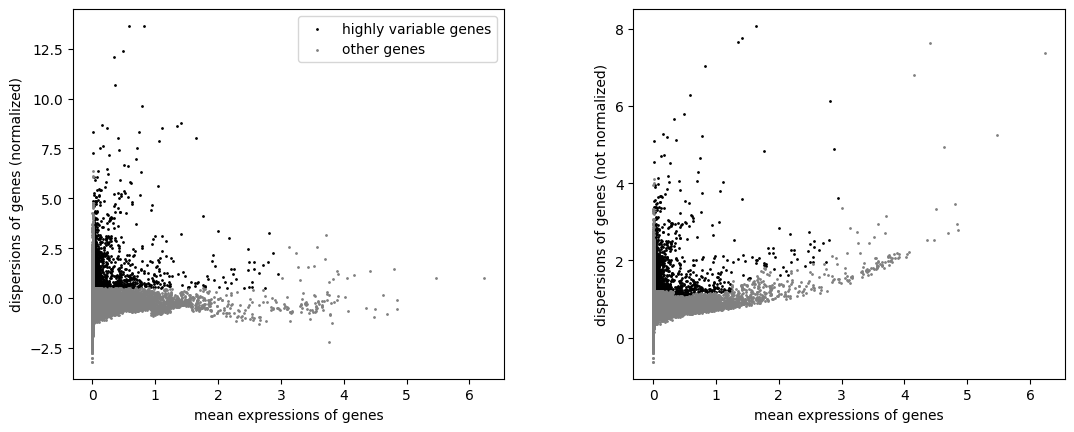

In [ ]:
# Highly variable genes
sc.pp.highly_variable_genes(adata_s1, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_s1)

In [ ]:
# Filtering highly variable
adata_s1 = adata_s1[:,adata_s1.var.highly_variable]

In [ ]:
adata_s1.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
CD69L,CD69L,Gene Expression,4074,False,4074,0.378329,71.147309,5342.0,True,0.487920,1.083433,0.515607
GOLGB1,GOLGB1,Gene Expression,3306,False,3306,0.352904,76.586402,4983.0,True,0.421458,1.278535,1.007533
LOC107050717,LOC107050717,Gene Expression,295,False,295,0.024292,97.910765,343.0,True,0.040543,1.286227,0.648766
ADM2,ADM2,Gene Expression,144,False,144,0.013669,98.980170,193.0,True,0.025849,1.582851,1.247111
UBE2H,UBE2H,Gene Expression,7443,False,7443,1.018909,47.287535,14387.0,True,0.962199,1.198157,0.533943
...,...,...,...,...,...,...,...,...,...,...,...,...
PPP1R12C,PPP1R12C,Gene Expression,239,False,239,0.017068,98.307365,241.0,True,0.033466,1.477181,1.033955
LOC100857892,LOC100857892,Gene Expression,43,False,43,0.006303,99.695467,89.0,True,0.018581,2.325713,2.745598
CLDN7,CLDN7,Gene Expression,224,False,224,0.019901,98.413598,281.0,True,0.039048,1.662424,1.407624
LOC112531448,LOC112531448,Gene Expression,171,False,171,0.017280,98.788952,244.0,True,0.029897,1.326607,0.730219


In [ ]:
adata_s1

View of AnnData object with n_obs × n_vars = 13019 × 1863
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
# Regress out effects of total counts and mitochondrial counts
sc.pp.regress_out(adata_s1, ['total_counts', 'pct_counts_mt'])

In [ ]:
# Scaling the data
sc.pp.scale(adata_s1, max_value = 10)

In [ ]:
adata_s1

AnnData object with n_obs × n_vars = 13019 × 1863
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

Dimentionality Reduction

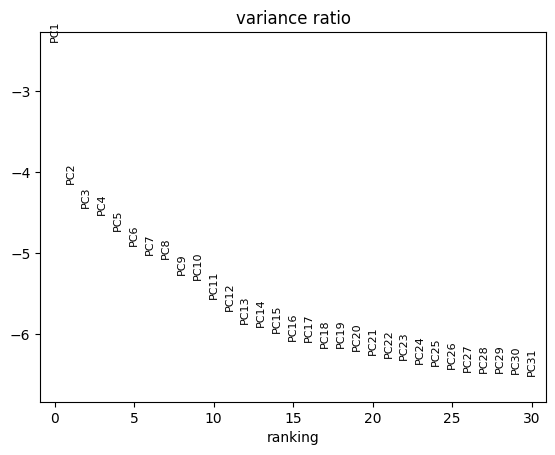

In [ ]:
# Calculating PCA
sc.tl.pca(adata_s1, svd_solver='arpack')
# Plotting PCA
sc.pl.pca_variance_ratio(adata_s1, log=True)

In [ ]:
adata_s1

AnnData object with n_obs × n_vars = 13019 × 1863
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Compute the cell neighborhood

In [ ]:
# Neighborhood graph
sc.pp.neighbors(adata_s1, n_pcs=25)
# Neighborhood matrices
adata_s1.obsp

PairwiseArrays with keys: distances, connectivities

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


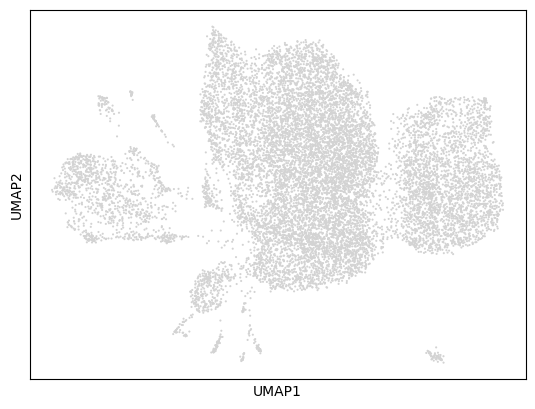

In [ ]:
# Visualization
sc.tl.umap(adata_s1)
sc.pl.umap(adata_s1)

Clustering

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


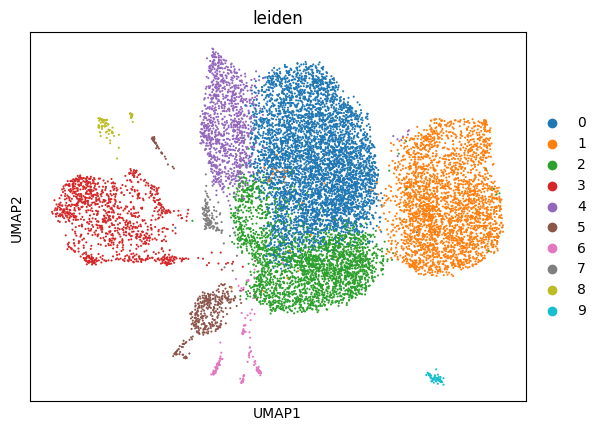

In [ ]:
# Clustering the neighborhood graph
sc.tl.leiden(adata_s1, resolution=0.25)
sc.pl.umap(adata_s1, color=['leiden'])

Finding markers

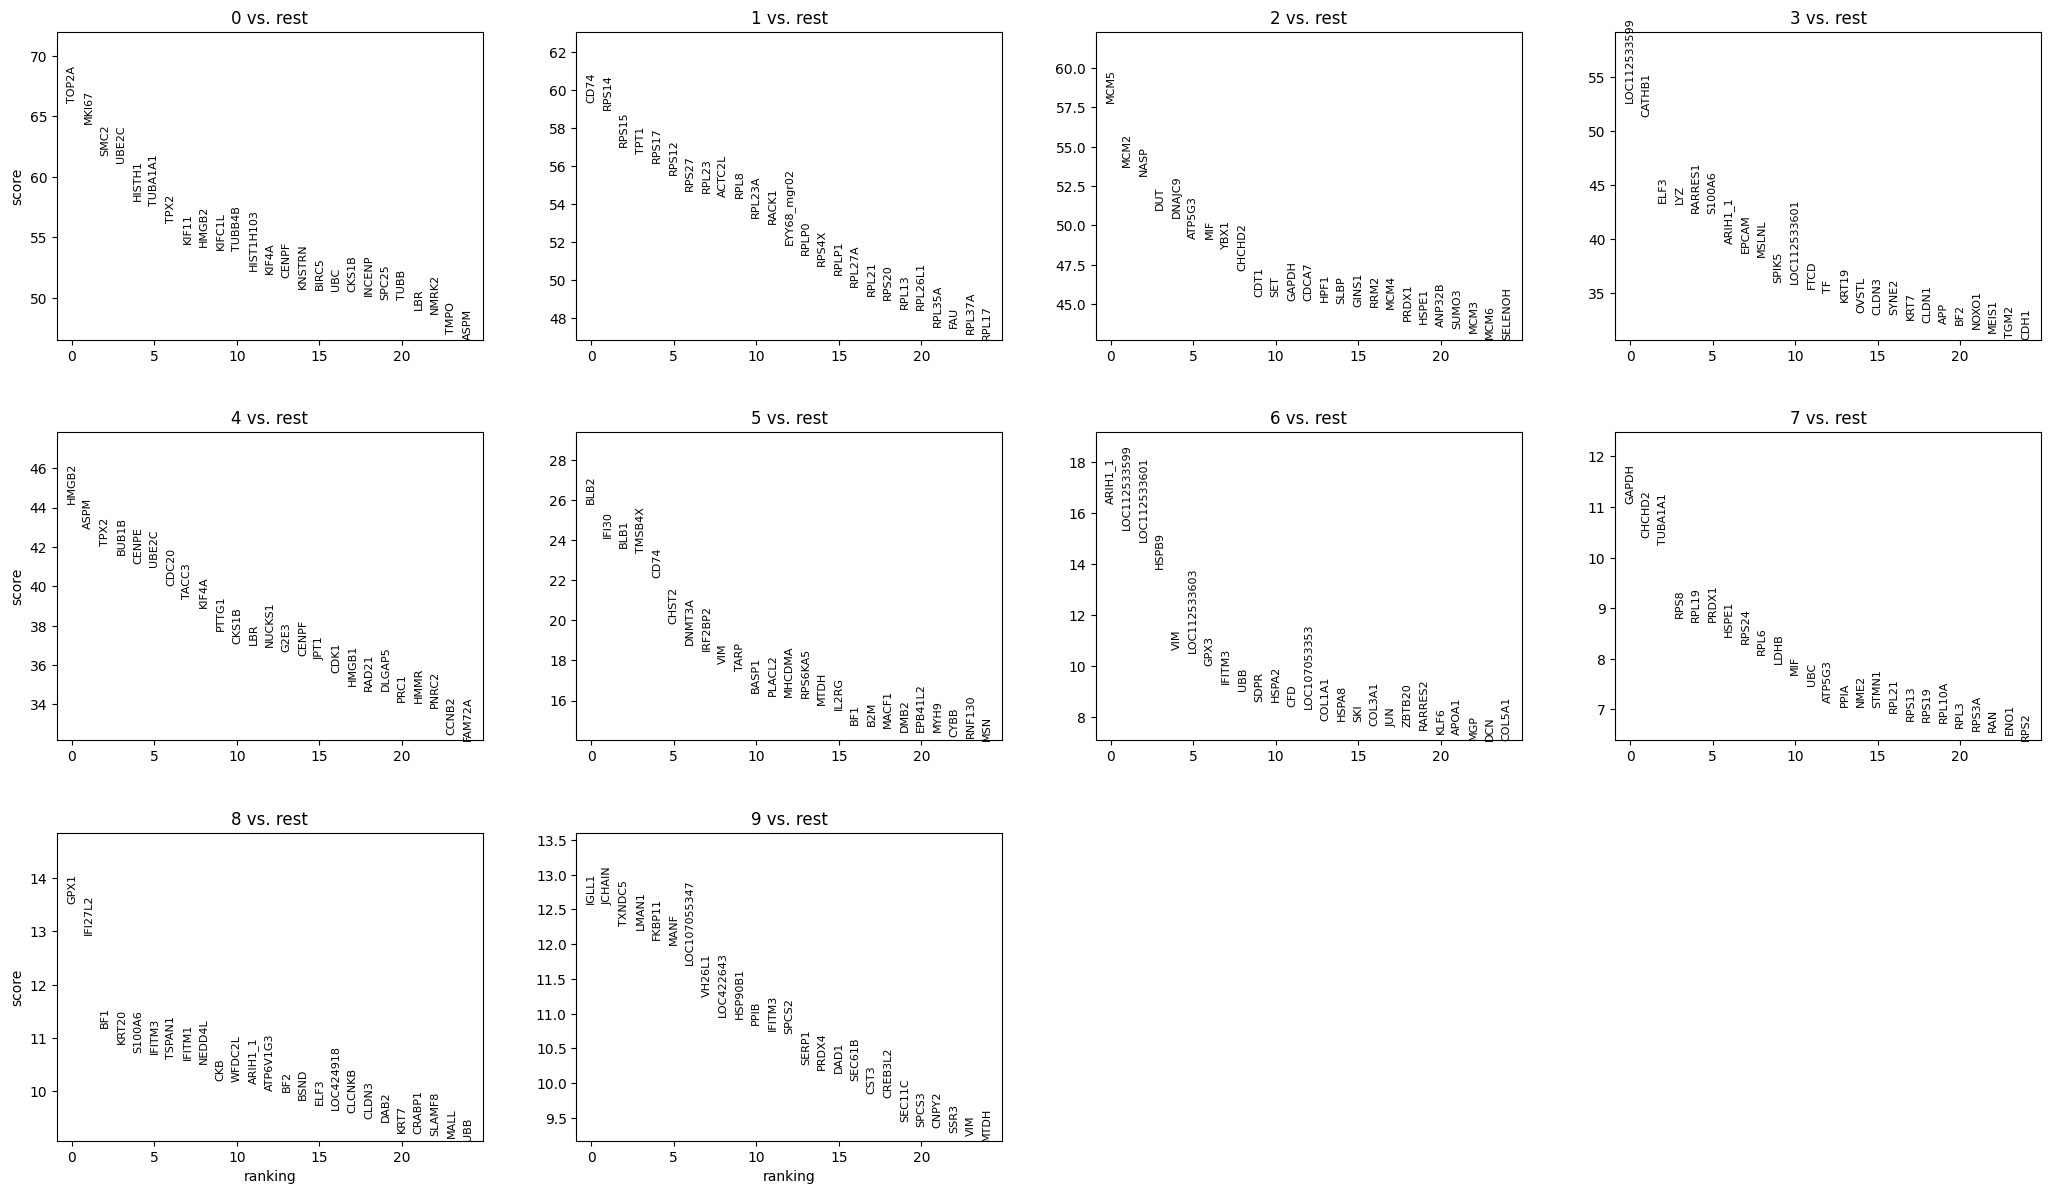

In [ ]:
# Finding markers
sc.tl.rank_genes_groups(adata_s1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_s1, n_genes=25, sharey=False)

In [ ]:
# Saving the markers as dataframe
marker_genes = pd.DataFrame(adata_s1.uns["rank_genes_groups"]["names"]).head(10)
marker_genes

,0,1,2,3,4,5,6,7,8,9
0,TOP2A,CD74,MCM5,LOC112533599,HMGB2,BLB2,ARIH1_1,GAPDH,GPX1,IGLL1
1,MKI67,RPS14,MCM2,CATHB1,ASPM,IFI30,LOC112533599,CHCHD2,IFI27L2,JCHAIN
2,SMC2,RPS15,NASP,ELF3,TPX2,BLB1,LOC112533601,TUBA1A1,BF1,TXNDC5
3,UBE2C,TPT1,DUT,LYZ,BUB1B,TMSB4X,HSPB9,RPS8,KRT20,LMAN1
4,HISTH1,RPS17,DNAJC9,RARRES1,CENPE,CD74,VIM,RPL19,S100A6,FKBP11
5,TUBA1A1,RPS12,ATP5G3,S100A6,UBE2C,CHST2,LOC112533603,PRDX1,IFITM3,MANF
6,TPX2,RPS27,MIF,ARIH1_1,CDC20,DNMT3A,GPX3,HSPE1,TSPAN1,LOC107055347
7,KIF11,RPL23,YBX1,EPCAM,TACC3,IRF2BP2,IFITM3,RPS24,IFITM1,VH26L1
8,HMGB2,ACTC2L,CHCHD2,MSLNL,KIF4A,VIM,UBB,RPL6,NEDD4L,LOC422643
9,KIFC1L,RPL8,CDT1,SPIK5,PTTG1,TARP,SDPR,LDHB,CKB,HSP90B1
